<h1>Part 03 : Feature Selection & Data Visualization</h1>
<h7>Feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. </h7>

<h2>Seaborn library</h2>
<h7>It is a Python data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.</h7>


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
dia = pd.read_csv('Diabetes.csv')

In [4]:
dia

Number of times pregnant  Plasma glucose concentration  \
0                           6                           148   
1                           1                            85   
2                           8                           183   
3                           1                            89   
4                           0                           137   
..                        ...                           ...   
763                        10                           101   
764                         2                           122   
765                         5                           121   
766                         1                           126   
767                         1                            93   

     Diastolic blood pressure  Triceps skin fold thickness  \
0                          72                           35   
1                          66                           29   
2                          64                            0   
3                          66                           23   
4                          40                           35   
..                        ...                          ...   
763                        76                           48   
764                        70                           27   
765                        72                           23   
766                        60                            0   
767                        70                           31   

     2-Hour serum insulin  Body mass index  Diabetes pedigree function  \
0                       0             33.6                       0.627   
1                       0             26.6                       0.351   
2                       0             23.3                       0.672   
3                      94             28.1                       0.167   
4                     168             43.1                       2.288   
..                    ...              ...                         ...   
763                   180             32.9                       0.171   
764                     0             36.8                       0.340   
765                   112             26.2                       0.245   
766                     0             30.1                       0.349   
767                     0             30.4                       0.315   

     Age (years) Class variable  
0             50            YES  
1             31             NO  
2             32            YES  
3             21             NO  
4             33            YES  
..           ...            ...  
763           63             NO  
764           27             NO  
765           30             NO  
766           47            YES  
767           23             NO  

[768 rows x 9 columns]

In [5]:
dia.rename(columns = {' Number of times pregnant' : 'num_time_preg', ' Plasma glucose concentration' : 'plasma_gluc_conc', ' Diastolic blood pressure' : 'dias_blood_pres',
            ' Triceps skin fold thickness' : 'tric_skin_fold_thick', ' 2-Hour serum insulin' : '2H_serum_insul', ' Body mass index' : 'BMI', ' Diabetes pedigree function' : 'dia_pedig_func',
            ' Age (years)' : 'age', ' Class variable' : 'output'}, inplace = True)

In [6]:
dia

num_time_preg  plasma_gluc_conc  dias_blood_pres  tric_skin_fold_thick  \
0                6               148               72                    35   
1                1                85               66                    29   
2                8               183               64                     0   
3                1                89               66                    23   
4                0               137               40                    35   
..             ...               ...              ...                   ...   
763             10               101               76                    48   
764              2               122               70                    27   
765              5               121               72                    23   
766              1               126               60                     0   
767              1                93               70                    31   

     2H_serum_insul   BMI  dia_pedig_func  age output  
0                 0  33.6           0.627   50    YES  
1                 0  26.6           0.351   31     NO  
2                 0  23.3           0.672   32    YES  
3                94  28.1           0.167   21     NO  
4               168  43.1           2.288   33    YES  
..              ...   ...             ...  ...    ...  
763             180  32.9           0.171   63     NO  
764               0  36.8           0.340   27     NO  
765             112  26.2           0.245   30     NO  
766               0  30.1           0.349   47    YES  
767               0  30.4           0.315   23     NO  

[768 rows x 9 columns]

In [7]:
dia.output.value_counts()

output
NO     500
YES    268
Name: count, dtype: int64

In [8]:
# Note:
# Target in this problem: Who has or does not have diabetes? (For new data)
# Solution: Useing MACHINE LEARNING :)

# In this problem ==> 'output' field is dependent variable, and other fields(bmi, age, plasma_glug, ...) are independent variable.

# Question: How to understand which columns have more effect in target (having diabeted) ?
#           Using Correlation!            

In [9]:
# Encoding (Convert string to numerical)
dia['output'] = dia['output'].str.replace('YES', '1')
dia['output'] = dia['output'].str.replace('NO', '0')

In [10]:
dia.output.value_counts()

output
0    500
1    268
Name: count, dtype: int64

<h2>Correlation</h2>

<h7>refers to the statistical relationship between the two entities. It measures the extent to which two variables are linearly related. For example, the height and weight of a person are related, and taller people tend to be heavier than shorter people. You can apply correlation to a variety of data sets.
</h7>

In [11]:
dia.corr()

num_time_preg  plasma_gluc_conc  dias_blood_pres  \
num_time_preg              1.000000          0.129459         0.141282   
plasma_gluc_conc           0.129459          1.000000         0.152590   
dias_blood_pres            0.141282          0.152590         1.000000   
tric_skin_fold_thick      -0.081672          0.057328         0.207371   
2H_serum_insul            -0.073535          0.331357         0.088933   
BMI                        0.017683          0.221071         0.281805   
dia_pedig_func            -0.033523          0.137337         0.041265   
age                        0.544341          0.263514         0.239528   
output                     0.221898          0.466581         0.065068   

                      tric_skin_fold_thick  2H_serum_insul       BMI  \
num_time_preg                    -0.081672       -0.073535  0.017683   
plasma_gluc_conc                  0.057328        0.331357  0.221071   
dias_blood_pres                   0.207371        0.088933  0.281805   
tric_skin_fold_thick              1.000000        0.436783  0.392573   
2H_serum_insul                    0.436783        1.000000  0.197859   
BMI                               0.392573        0.197859  1.000000   
dia_pedig_func                    0.183928        0.185071  0.140647   
age                              -0.113970       -0.042163  0.036242   
output                            0.074752        0.130548  0.292695   

                      dia_pedig_func       age    output  
num_time_preg              -0.033523  0.544341  0.221898  
plasma_gluc_conc            0.137337  0.263514  0.466581  
dias_blood_pres             0.041265  0.239528  0.065068  
tric_skin_fold_thick        0.183928 -0.113970  0.074752  
2H_serum_insul              0.185071 -0.042163  0.130548  
BMI                         0.140647  0.036242  0.292695  
dia_pedig_func              1.000000  0.033561  0.173844  
age                         0.033561  1.000000  0.238356  
output                      0.173844  0.238356  1.000000

<h2>Seaborn.heatmap</h2>
<h7>It takes a data matrix as input and plots that matrix as a heatmap. Each cell in the heatmap corresponds to a data point in the matrix, and the color of the cell represents the value of that data point.
</h7>

<Axes: >

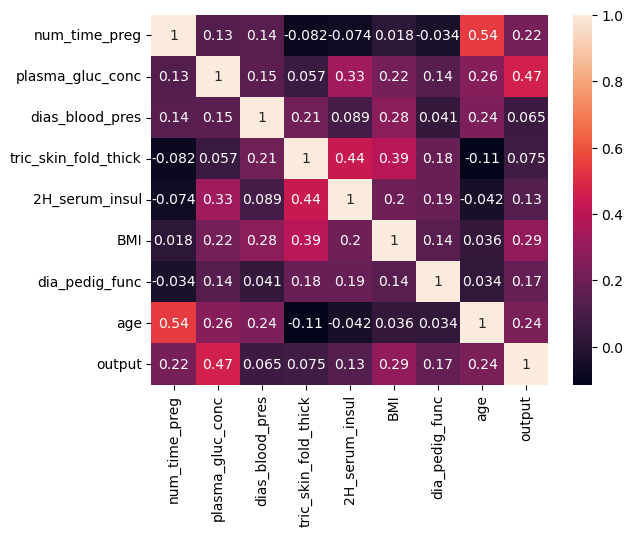

In [19]:
cor = dia.corr()
sn.heatmap(cor, annot = True)

<h2>Matplotlib library</h2>
<h7>It is a low level graph plotting library in python that serves as a visualization utility</h7>

<h2>Matplotlib.pyplot</h2>
<h7>It is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.</h7>

<h2>Seaborn.pairplot</h2>
<h7>It allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.</h7>

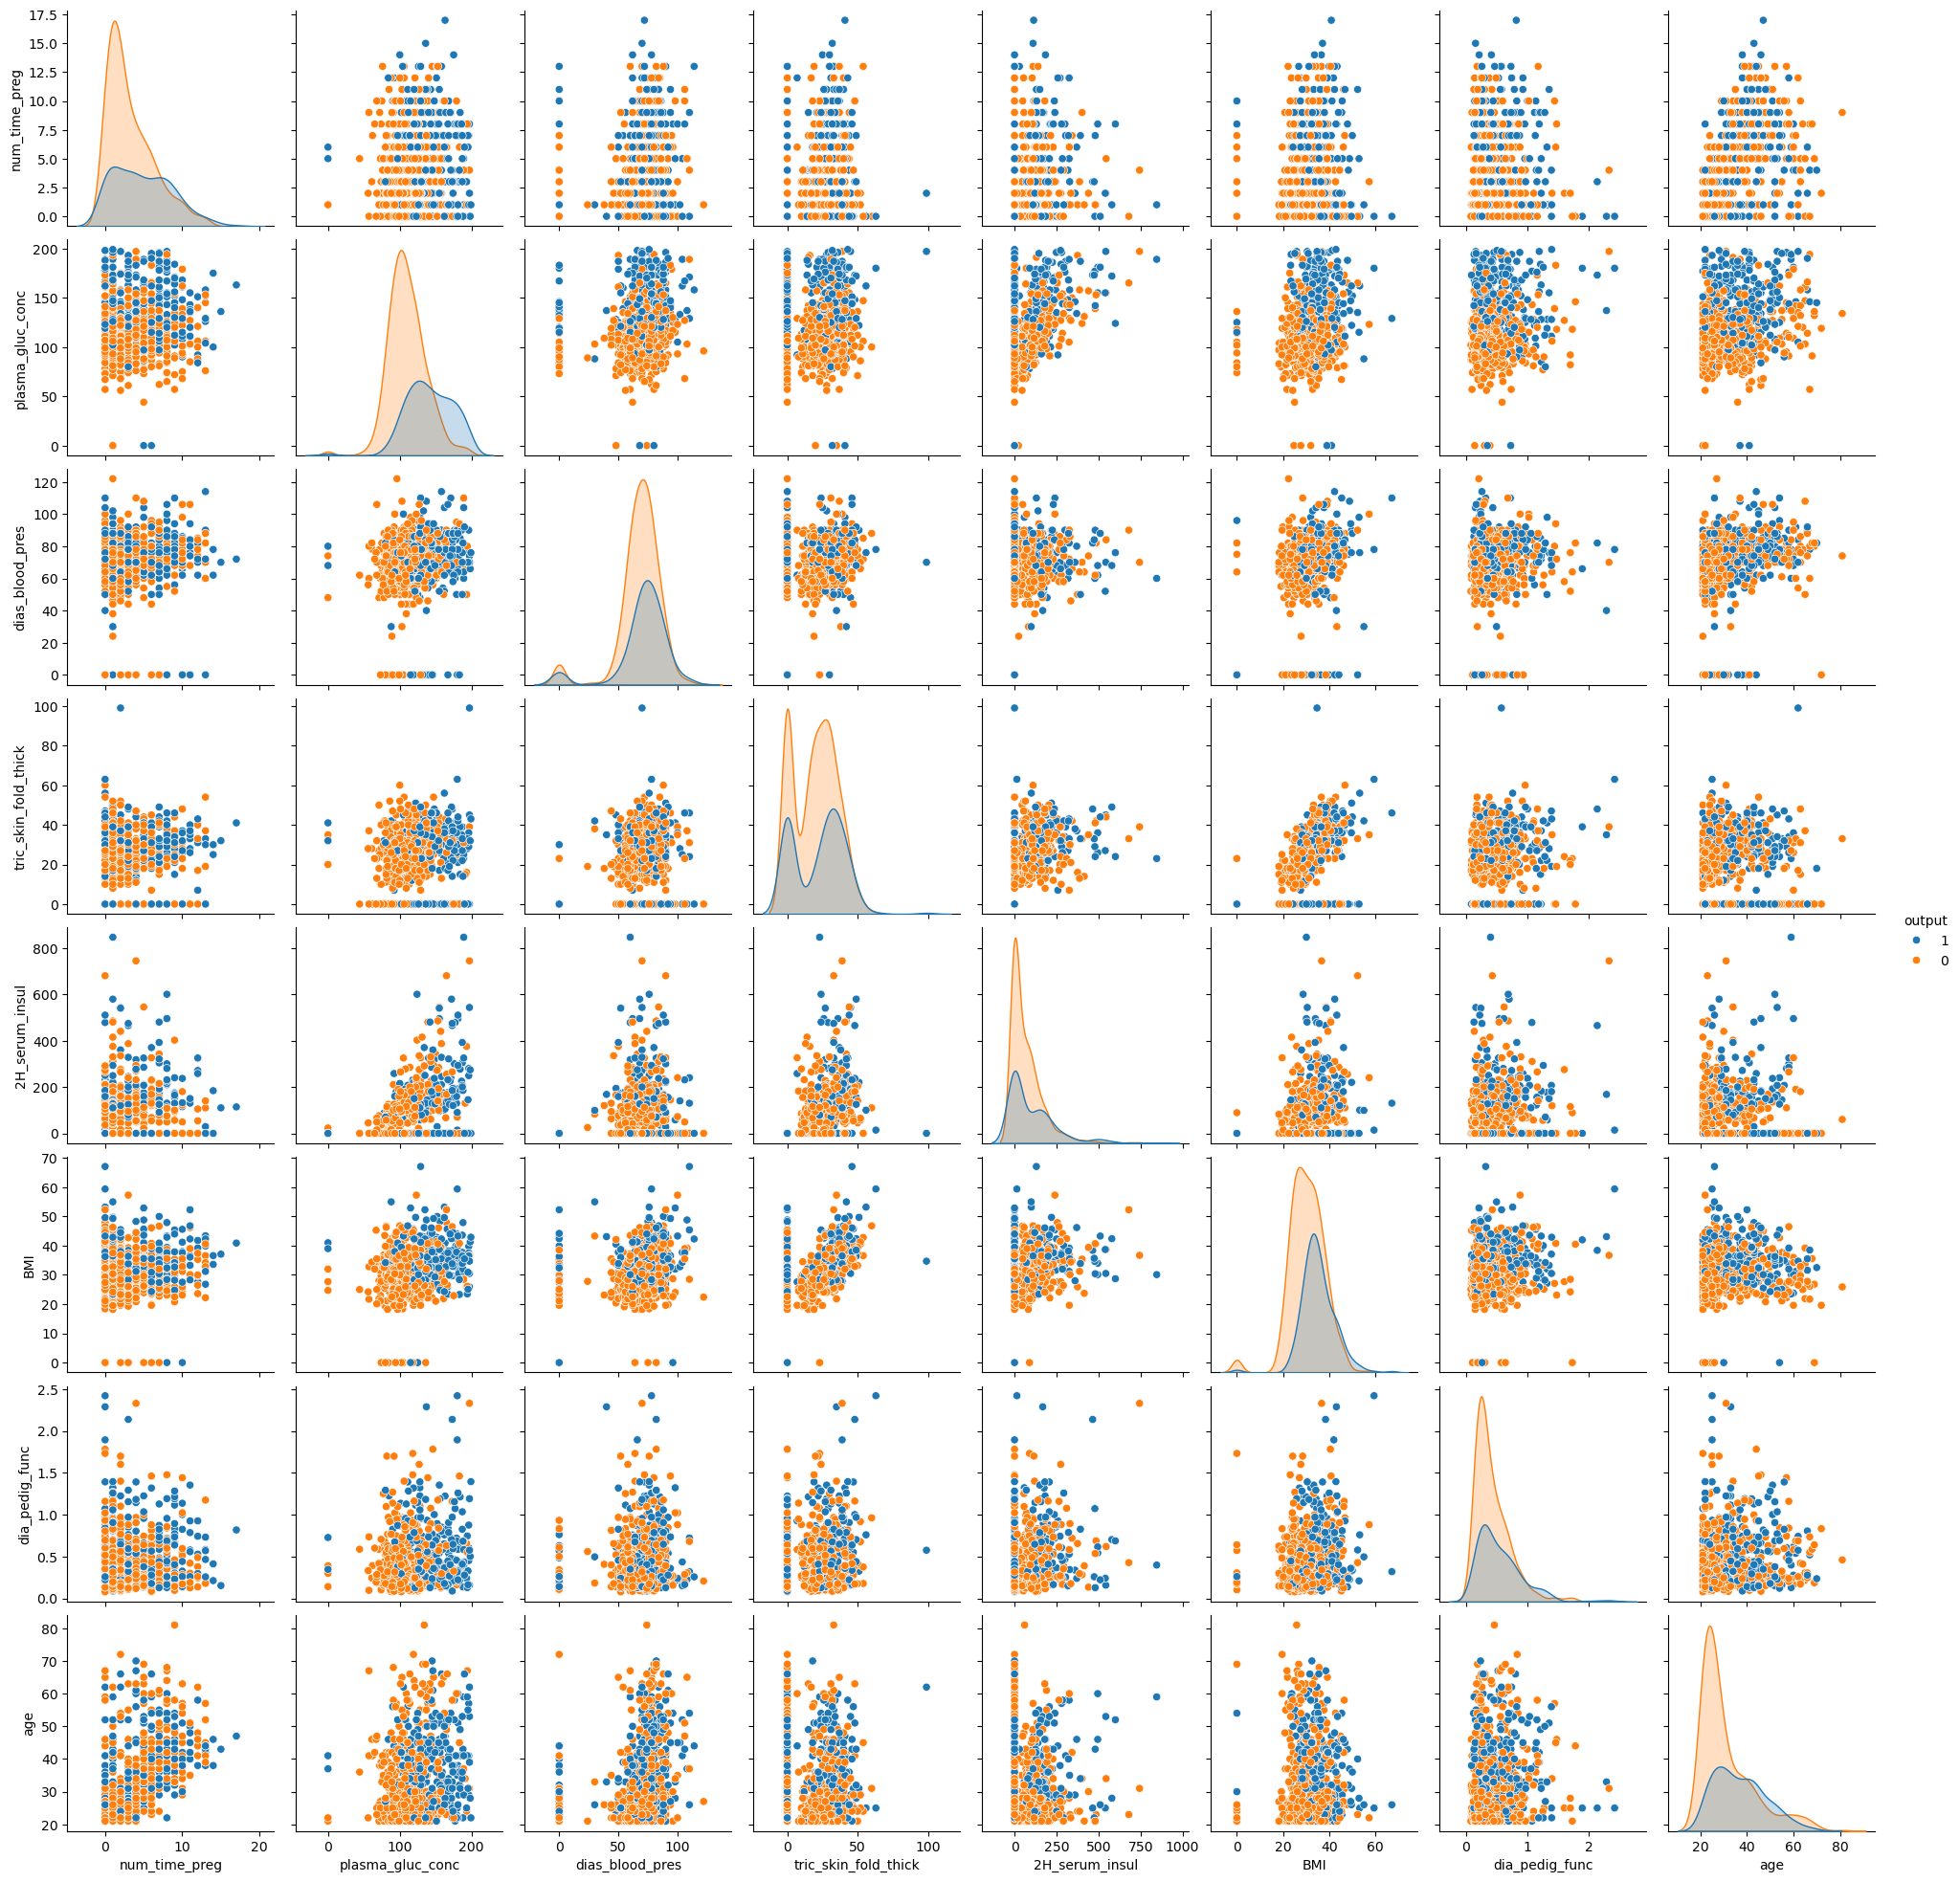

In [28]:
import matplotlib.pyplot as plt
sn.pairplot(dia, hue = 'output')
# You can use the 'hue' parameter when creating pairplots in seaborn to color plot aspects based on the values of a specific variable.
# plt.show()     # no need here

In [29]:
# Note:
# Classifier ==> output is discrete (e: diabet(is/is not), iris(class), titanic(survived))
# Regressor ==> output is Continuous (age, price, ...)

In [ ]:
iris = pd.read_csv('iris.csv')

In [26]:
iris

sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [30]:
y_iris = pd.Categorical(iris['class']).codes     #Encoding of a column values

In [31]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

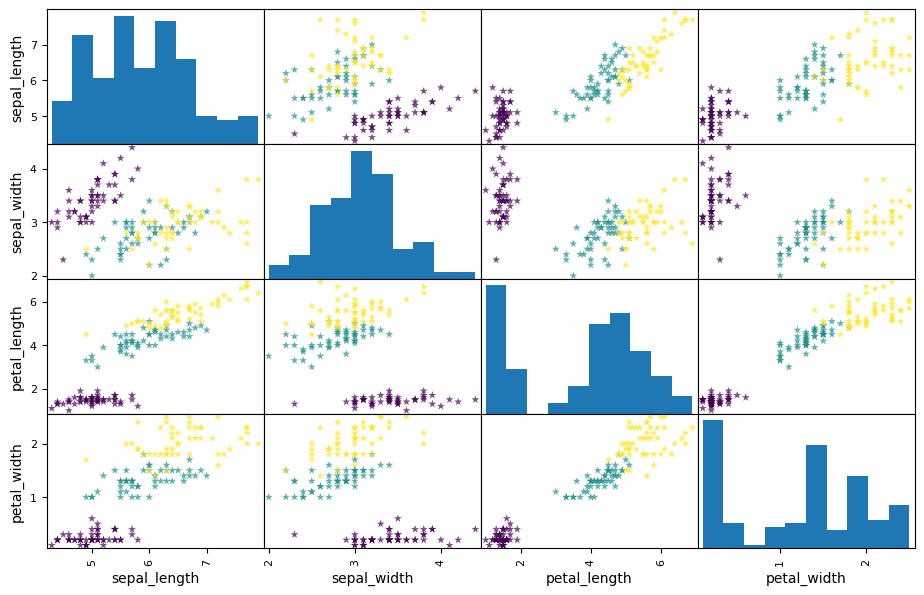

In [48]:
pd.plotting.scatter_matrix(iris, marker = '*', c = y_iris, figsize=(7*1.6, 7), alpha = 0.7)     # Similar to Seaborn.pairplot
# alph ==> transparency

<Axes: >

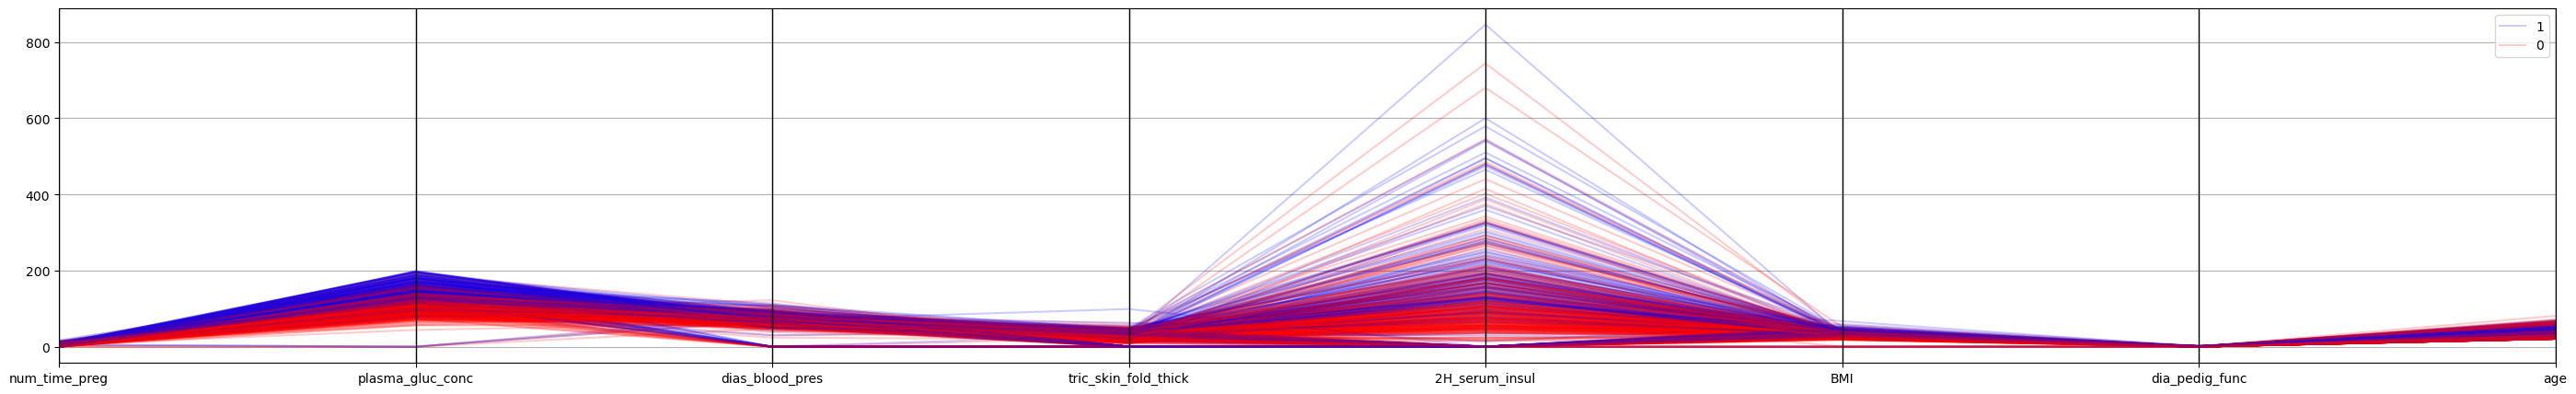

In [60]:
plt.figure(figsize=(35, 5))
pd.plotting.parallel_coordinates(dia, 'output', color = ['blue', 'red'], alpha = 0.2)

In [61]:
dia

num_time_preg  plasma_gluc_conc  dias_blood_pres  tric_skin_fold_thick  \
0                6               148               72                    35   
1                1                85               66                    29   
2                8               183               64                     0   
3                1                89               66                    23   
4                0               137               40                    35   
..             ...               ...              ...                   ...   
763             10               101               76                    48   
764              2               122               70                    27   
765              5               121               72                    23   
766              1               126               60                     0   
767              1                93               70                    31   

     2H_serum_insul   BMI  dia_pedig_func  age output  
0                 0  33.6           0.627   50      1  
1                 0  26.6           0.351   31      0  
2                 0  23.3           0.672   32      1  
3                94  28.1           0.167   21      0  
4               168  43.1           2.288   33      1  
..              ...   ...             ...  ...    ...  
763             180  32.9           0.171   63      0  
764               0  36.8           0.340   27      0  
765             112  26.2           0.245   30      0  
766               0  30.1           0.349   47      1  
767               0  30.4           0.315   23      0  

[768 rows x 9 columns]

In [63]:
dia.dia_pedig_func = dia.dia_pedig_func * 100     # faster way, instead of normalize for better show of this field in plot  

In [64]:
dia

num_time_preg  plasma_gluc_conc  dias_blood_pres  tric_skin_fold_thick  \
0                6               148               72                    35   
1                1                85               66                    29   
2                8               183               64                     0   
3                1                89               66                    23   
4                0               137               40                    35   
..             ...               ...              ...                   ...   
763             10               101               76                    48   
764              2               122               70                    27   
765              5               121               72                    23   
766              1               126               60                     0   
767              1                93               70                    31   

     2H_serum_insul   BMI  dia_pedig_func  age output  
0                 0  33.6            62.7   50      1  
1                 0  26.6            35.1   31      0  
2                 0  23.3            67.2   32      1  
3                94  28.1            16.7   21      0  
4               168  43.1           228.8   33      1  
..              ...   ...             ...  ...    ...  
763             180  32.9            17.1   63      0  
764               0  36.8            34.0   27      0  
765             112  26.2            24.5   30      0  
766               0  30.1            34.9   47      1  
767               0  30.4            31.5   23      0  

[768 rows x 9 columns]

<Axes: >

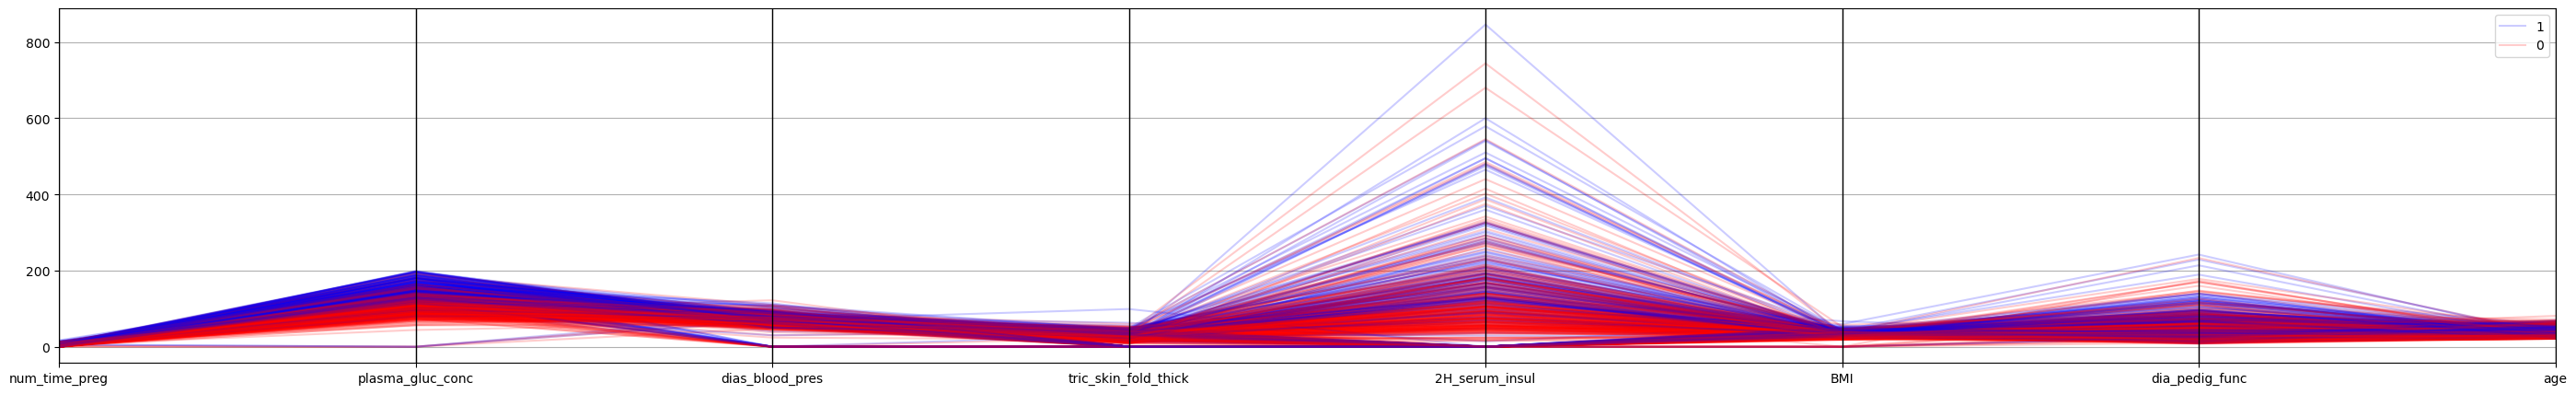

In [66]:
plt.figure(figsize=(35, 5))
pd.plotting.parallel_coordinates(dia, 'output', color = ['blue', 'red'], alpha = 0.2)

<h2>Normalization</h2>
<h7>It refers to rescaling real-valued numeric attributes into a 0 to 1 range. Data normalization is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.</h7>

In [73]:
dia.num_time_preg

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: num_time_preg, Length: 768, dtype: int64

In [75]:
dia.num_time_preg.max()

17

In [76]:
dia.num_time_preg.min()

0

In [83]:
# dia = (dia - (dia.min())) / dia.max()     # don't work

In [86]:
dia.columns

Index(['num_time_preg', 'plasma_gluc_conc', 'dias_blood_pres',
       'tric_skin_fold_thick', '2H_serum_insul', 'BMI', 'dia_pedig_func',
       'age', 'output'],
      dtype='object')

In [78]:
dia.num_time_preg = dia.num_time_preg.apply(lambda x : (x - dia.num_time_preg.min()) / dia.num_time_preg.max())

In [80]:
dia.num_time_preg.max()

1.0

In [81]:
dia.num_time_preg.min()

0.0

In [82]:
dia.plasma_gluc_conc = dia.plasma_gluc_conc.apply(lambda x : (x - dia.plasma_gluc_conc.min()) / dia.plasma_gluc_conc.max())

In [87]:
dia.dias_blood_pres = dia.dias_blood_pres.apply(lambda x : (x - dia.dias_blood_pres.min()) / dia.dias_blood_pres.max())

In [93]:
dia.tric_skin_fold_thick = dia.tric_skin_fold_thick.apply(lambda x : (x - dia.tric_skin_fold_thick.min()) / dia.tric_skin_fold_thick.max())

In [96]:
dia['2H_serum_insul'] = dia['2H_serum_insul'].apply(lambda x : (x - dia['2H_serum_insul'].min()) / dia['2H_serum_insul'].max())

In [97]:
dia.BMI = dia.BMI.apply(lambda x : (x - dia.BMI.min()) / dia.BMI.max())

In [98]:
dia.dia_pedig_func = dia.dia_pedig_func.apply(lambda x : (x - dia.dia_pedig_func.min()) / dia.dia_pedig_func.max())

In [99]:
dia.age = dia.age.apply(lambda x : (x - dia.age.min()) / dia.age.max())

In [100]:
dia.max()

num_time_preg                1.0
plasma_gluc_conc             1.0
dias_blood_pres              1.0
tric_skin_fold_thick         1.0
2H_serum_insul               1.0
BMI                          1.0
dia_pedig_func          0.967769
age                     0.740741
output                         1
dtype: object

In [101]:
dia.min()

num_time_preg           0.0
plasma_gluc_conc        0.0
dias_blood_pres         0.0
tric_skin_fold_thick    0.0
2H_serum_insul          0.0
BMI                     0.0
dia_pedig_func          0.0
age                     0.0
output                    0
dtype: object

<Axes: >

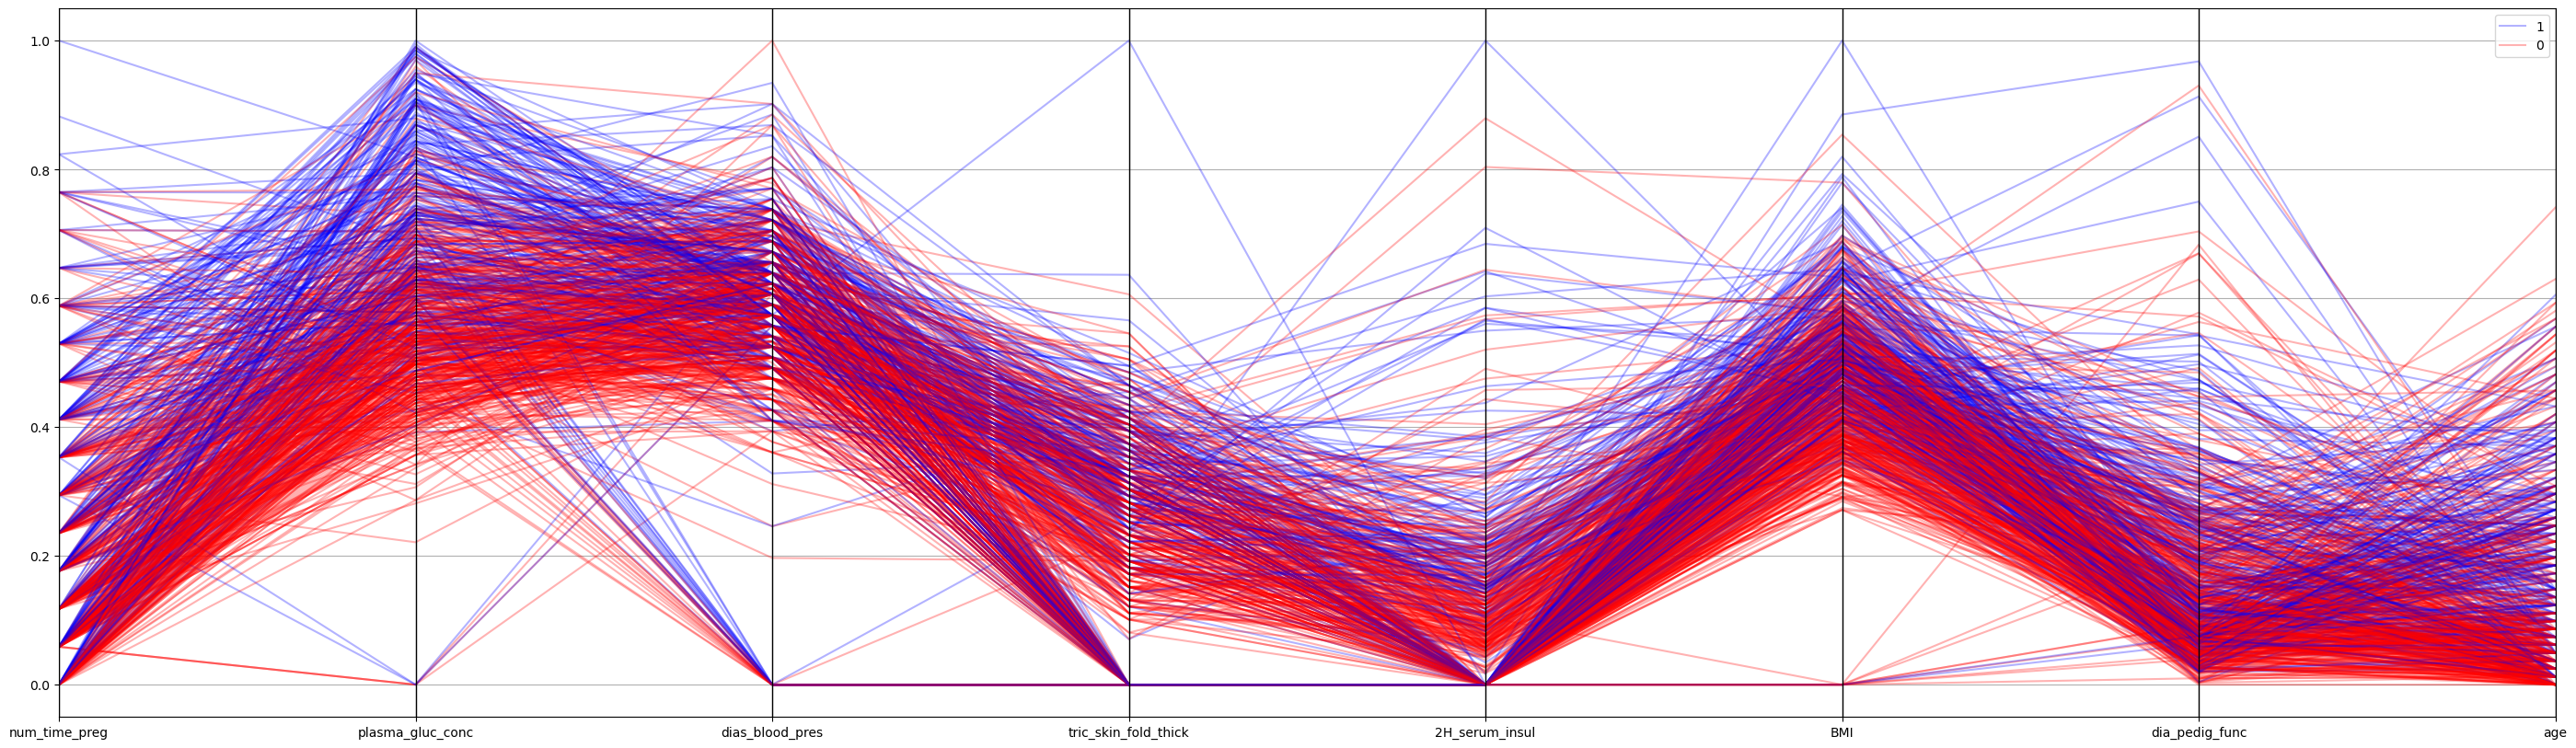

In [105]:
plt.figure(figsize=(35, 10))
pd.plotting.parallel_coordinates(dia, 'output', color = ['blue', 'red'], alpha = 0.3)